### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Constants

In [3]:
PATH_FILE_ORDER = './file/olist_orders_dataset.csv'
PATH_FILE_ORDER_ITEM = './file/olist_order_items_dataset.csv'
PATH_FILE_ORDER_REVIEW = './file/olist_order_reviews_dataset.csv'
PATH_FILE_ORDER_PAYMENT = './file/olist_order_payments_dataset.csv'

PATH_FILE_PROD = './file/olist_products_dataset.csv'
PATH_FILE_SELLER = './file/olist_sellers_dataset.csv'
PATH_FILE_CUSTOMER = './file/olist_customers_dataset.csv'
PATH_FILE_GEOLOCATION = './file/olist_geolocation_dataset.csv'
PATH_FILE_PROD_CATEGORY_TRANSLATE = './file/product_category_name_translation.csv'

# Reviews Data

### Constants

In [4]:

# Original columns
COL_REV_ID = 'review_id'
COL_REV_MSG = 'review_comment_message'
COL_REV_ORDER = 'order_id'
COL_REV_SCORE = 'review_score'
COL_REV_TITLE = 'review_comment_title'
COL_REV_ANSWER = 'review_answer_timestamp'
COL_REV_CREATION = 'review_creation_date'

# Custom Columns
COL_REV_CUS_MSG_LEN = 'Message Length'

### Build Dataframe

In [6]:
# Import file
reviewsDF = pd.read_csv(PATH_FILE_ORDER_REVIEW)
reviewsDFClean = reviewsDF[reviewsDF[COL_REV_MSG].notnull()]

# Handle NaN values
reviewsDF.loc[reviewsDF[COL_REV_MSG].isnull(), COL_REV_MSG] = ''
reviewsDF.loc[reviewsDF[COL_REV_TITLE].isnull(), COL_REV_TITLE] = ''

reviewsDFClean.loc[reviewsDFClean[COL_REV_TITLE].isnull(), COL_REV_TITLE] = ''

# Compute review lengths
reviewsDF[COL_REV_CUS_MSG_LEN] = reviewsDF[COL_REV_MSG].apply(lambda msg: len(msg))
reviewsDFClean[COL_REV_CUS_MSG_LEN] = reviewsDFClean[COL_REV_MSG].apply(lambda msg: len(msg))

# Format
sort_review = [COL_REV_SCORE, COL_REV_CUS_MSG_LEN, COL_REV_CREATION, COL_REV_MSG, COL_REV_TITLE]
# columns_review = [COL_REV_SCORE, COL_REV_CUS_MSG_LEN, COL_REV_MSG, COL_REV_TITLE]
reviewsDF = reviewsDF.sort_values(by=sort_review, ascending=False)
reviewsDFClean = reviewsDFClean.sort_values(by=sort_review, ascending=False)


/var/folders/ws/1z4nb4vx0j70c10_qdwm_cxc0000gn/T/ipykernel_1709/600969293.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewsDFClean[COL_REV_CUS_MSG_LEN] = reviewsDFClean[COL_REV_MSG].apply(lambda msg: len(msg))


### Statistics

In [7]:
reviewsCount = reviewsDF.shape[0]
noMsgReviewsCount = reviewsDF.loc[reviewsDF[COL_REV_CUS_MSG_LEN] == 0].shape[0]
noMsgReviewsRatio = round(noMsgReviewsCount / reviewsCount * 100, 2)

print(f'Reviews: {reviewsCount}')
print(f'Empty message reviews: {noMsgReviewsCount} / {reviewsCount} ({noMsgReviewsRatio}%)')

scoreValues = sorted(reviewsDF[COL_REV_SCORE].unique())
for score in scoreValues:

    scoredDF = reviewsDF.loc[reviewsDF[COL_REV_SCORE] == score]

    scoredCount = scoredDF.shape[0]
    scoredRatio = round(scoredCount / reviewsCount * 100, 2)
    noMsgScoredCount = scoredDF.loc[reviewsDF[COL_REV_CUS_MSG_LEN] == 0].shape[0]
    noMsgScoredRation = round(noMsgScoredCount / scoredCount * 100, 2)

    print(f'{score} Score: {scoredCount} / {reviewsCount} ({scoredRatio}%)')
    print(f'\tNo message: {noMsgScoredCount} / {scoredCount} ({noMsgScoredRation}%)')

Reviews: 100000
Empty message reviews: 58247 / 100000 (58.25%)
1 Score: 11858 / 100000 (11.86%)
	No message: 2679 / 11858 (22.59%)
2 Score: 3235 / 100000 (3.23%)
	No message: 1006 / 3235 (31.1%)
3 Score: 8287 / 100000 (8.29%)
	No message: 4622 / 8287 (55.77%)
4 Score: 19200 / 100000 (19.2%)
	No message: 13166 / 19200 (68.57%)
5 Score: 57420 / 100000 (57.42%)
	No message: 36774 / 57420 (64.04%)


### Plots

/var/folders/ws/1z4nb4vx0j70c10_qdwm_cxc0000gn/T/ipykernel_1709/2605248469.py:62: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figure.show()


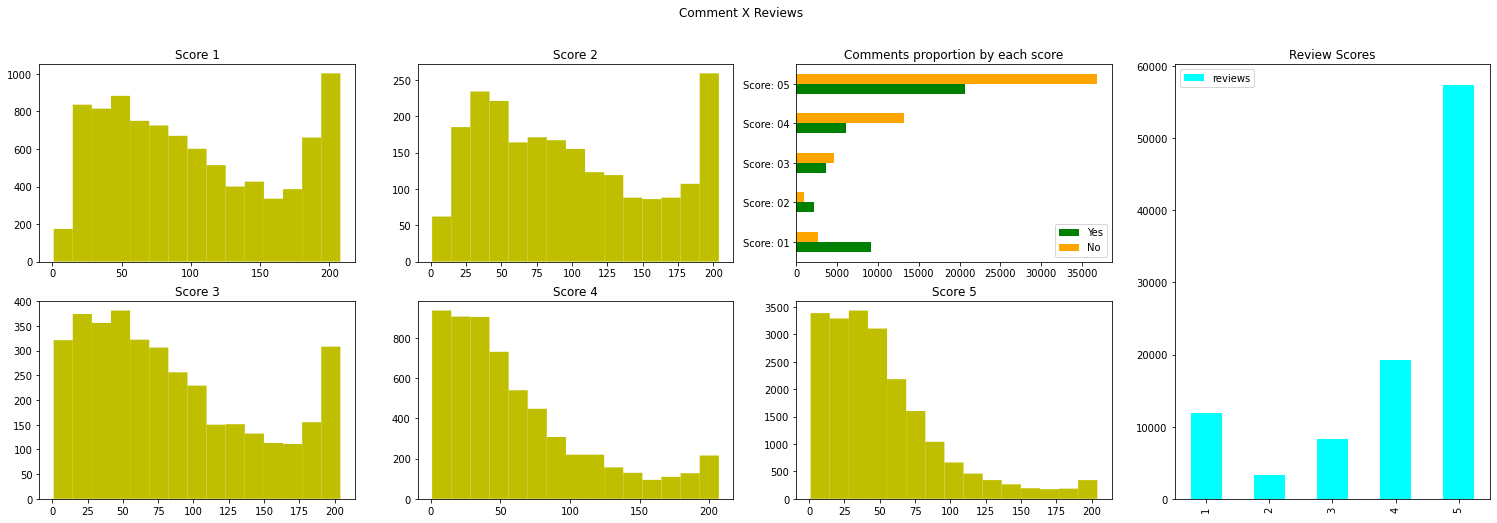

In [10]:

# Build grid
figure = plt.figure(figsize=(26, 8))

a11 = plt.subplot2grid((2, 4), (0, 0), fig=figure)
a12 = plt.subplot2grid((2, 4), (0, 1), fig=figure)
a13 = plt.subplot2grid((2, 4), (0, 2), fig=figure)

a14 = plt.subplot2grid((2, 4), (0, 3), fig=figure, rowspan=2)

a21 = plt.subplot2grid((2, 4), (1, 0), fig=figure)
a22 = plt.subplot2grid((2, 4), (1, 1), fig=figure)
a23 = plt.subplot2grid((2, 4), (1, 2), fig=figure)

# Bars graph: Total of review per each score.
bars = pd.DataFrame({
        'reviews': [
            reviewsDF[reviewsDF[COL_REV_SCORE] == 1].shape[0],
            reviewsDF[reviewsDF[COL_REV_SCORE] == 2].shape[0],
            reviewsDF[reviewsDF[COL_REV_SCORE] == 3].shape[0],
            reviewsDF[reviewsDF[COL_REV_SCORE] == 4].shape[0],
            reviewsDF[reviewsDF[COL_REV_SCORE] == 5].shape[0],
        ]
    },
    index=[1, 2, 3, 4, 5],
)

bars.plot.bar(ax=a14, title='Review Scores', color='cyan')

# Bars graph: Show proportion of reviews with or without comments per each score level.
yes = []
no = []
scores = []

for i in range(1, 6):
    _yes = reviewsDF[(reviewsDF[COL_REV_SCORE] == i) & (reviewsDF[COL_REV_CUS_MSG_LEN] > 0)].shape[0]
    _no = reviewsDF[(reviewsDF[COL_REV_SCORE] == i) & (reviewsDF[COL_REV_CUS_MSG_LEN] == 0)].shape[0]
    total = _yes + _no

    scores.append('Score: 0' + str(i))
    yes.append(_yes)
    no.append(_no)

barh = pd.DataFrame({ 'Yes': yes, 'No': no }, index=scores)
barh.plot.barh(
    ax=a13,
    title='Comments proportion by each score',
    color={ 'Yes': 'green', 'No': 'orange', 'AVG': 'c'},
)

# Histograms: Show length of commentaries per each review score level
figPositionMap = {
    1: a11, 2: a12,
    3: a21, 4: a22, 5: a23,
}

for i in range(1, 6):
    a = figPositionMap.get(i)
    a.hist(reviewsDFClean[reviewsDFClean[COL_REV_SCORE] == i][COL_REV_CUS_MSG_LEN].values, bins=15, facecolor='y', snap=False)
    a.set_title('Score ' + str(i))

figure.suptitle('Comment X Reviews')
figure.show()

# Orders

### Constants

In [70]:

# Original columns
COL_ORD_ID = 'order_id'
COL_ORD_STATUS = 'order_status'
COL_ORD_CUSTOMER = 'customer_id'

COL_ORD_DATE_BUY = 'order_purchase_timestamp'
COL_ORD_DATE_APPROV = 'order_approved_at'
COL_ORD_DATE_CARRIER = 'order_delivered_carrier_date'
COL_ORD_DATE_DELIVER = 'order_delivered_customer_date'
COL_ORD_DATE_DELIVER_EST = 'order_estimated_delivery_date'

# Custom columns
COL_ORD_CUS_TIME_SHIP = 'Time to Ship'
COL_ORD_CUS_TIME_DELAY = 'Delivery Delay'
COL_ORD_CUS_TIME_APPROV = 'Time to Approve'
COL_ORD_CUS_TIME_DELIVER = 'Time to Deliver'

# Status
STATUS_ORD_APPROV = 'approved'
STATUS_ORD_CANCEL = 'canceled'
STATUS_ORD_CREATED = 'created'
STATUS_ORD_DELIVERED = 'delivered'
STATUS_ORD_INVOICED = 'invoiced'
STATUS_ORD_PROCESSING = 'processing'
STATUS_ORD_SHIPPED = 'shipped'
STATUS_ORD_UNAVAILABLE = 'unavailable'

# Rename
sortOrder = [COL_ORD_STATUS, COL_ORD_CUS_TIME_DELAY, COL_ORD_CUS_TIME_DELIVER]

dateColumns = [COL_ORD_DATE_BUY, COL_ORD_DATE_DELIVER, COL_ORD_DATE_DELIVER_EST]

columnsOrder = [
    COL_ORD_STATUS,
    COL_ORD_DATE_BUY, COL_ORD_DATE_DELIVER_EST, COL_ORD_DATE_DELIVER,
    COL_ORD_CUS_TIME_DELIVER, COL_ORD_CUS_TIME_DELAY
]

endStatuses = [STATUS_ORD_CANCEL, STATUS_ORD_DELIVERED, STATUS_ORD_UNAVAILABLE]
midStatuses = [STATUS_ORD_CREATED, STATUS_ORD_APPROV, STATUS_ORD_INVOICED, STATUS_ORD_PROCESSING, STATUS_ORD_SHIPPED]

### Build Dataframe

In [88]:
# Import file
ordersDF = pd.read_csv(PATH_FILE_ORDER)
ordersDF[ ordersDF[COL_ORD_STATUS] != STATUS_ORD_UNAVAILABLE]

# Add calculated interval fields 
ordersDF[dateColumns] = ordersDF[dateColumns].apply(pd.to_datetime)

ordersDF[ ordersDF[COL_ORD_STATUS] != STATUS_ORD_DELIVERED ][COL_ORD_CUS_TIME_DELAY] = (pd.datetime.today - ordersDF[COL_ORD_DATE_DELIVER_EST]).dt.days
ordersDF[ ordersDF[COL_ORD_STATUS] == STATUS_ORD_DELIVERED ][COL_ORD_CUS_TIME_DELAY] = (ordersDF[COL_ORD_DATE_DELIVER] - ordersDF[COL_ORD_DATE_DELIVER_EST]).dt.days

ordersDF[ ordersDF[COL_ORD_STATUS] != STATUS_ORD_DELIVERED ][COL_ORD_CUS_TIME_DELIVER] = 0
ordersDF[ ordersDF[COL_ORD_STATUS] == STATUS_ORD_DELIVERED ][COL_ORD_CUS_TIME_DELIVER] = (ordersDF[COL_ORD_DATE_DELIVER] - ordersDF[COL_ORD_DATE_BUY]).dt.days

# Format
ordersDF = ordersDF[
    (ordersDF[COL_ORD_CUS_TIME_DELAY] >= 0) | (ordersDF[COL_ORD_CUS_TIME_DELIVER] >= 0)
    | (ordersDF[COL_ORD_STATUS] not in endStatuses)
]
ordersDF = ordersDF.sort_values(by=sortOrder, ascending=True, na_position='first')

ordersDF.groupby(COL_ORD_STATUS).count()
# ordersDF[ (ordersDF[COL_ORD_STATUS] == STATUS_ORD_UNAVAILABLE) & (ordersDF[COL_ORD_DATE_DELIVER_EST].isnull())]

/var/folders/ws/1z4nb4vx0j70c10_qdwm_cxc0000gn/T/ipykernel_1709/423457517.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ordersDF[ ordersDF[COL_ORD_STATUS] != STATUS_ORD_DELIVERED ][COL_ORD_CUS_TIME_DELAY] = (pd.datetime.today - ordersDF[COL_ORD_DATE_DELIVER_EST]).dt.days


TypeError: unsupported operand type(s) for -: 'DatetimeArray' and 'builtin_function_or_method'

### Foo

In [43]:
# ordersDF[columnsOrder].loc[ ordersDF[COL_ORD_CUS_TIME_DELAY] > 0 ]
# ordersDF[[COL_ORD_STATUS, COL_ORD_CUS_TIME_DELAY]].groupby(COL_ORD_STATUS).mean()
ordersDF.head()



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Time to Ship,Delivery Delay,Time to Approve,Time to Deliver
47552,1612081119e8f23745698ad3367cc14b,20d32833d8983a835cafcd54099631a0,unavailable,2016-10-05 18:06:48,2017-04-11 15:17:38,NaT,NaT,2016-11-17,NaN,NaN,187.0,NaN
43697,0a5c74ccc786ced7903270de9d6c170a,c021456db05f8e71f0985bef8859b793,unavailable,2018-01-18 23:14:36,2018-02-20 12:05:54,NaT,NaT,2018-02-14,NaN,NaN,32.0,NaN
42482,4bbe949608f669144f0db3f8cde75cd7,e23f90c411de6df260df42b05c1d4732,unavailable,2017-09-05 14:22:59,2017-09-13 11:10:20,NaT,NaT,2017-10-09,NaN,NaN,7.0,NaN
13365,208edba34ba9cf8d8f603672e1966b75,41b48c909c686ce16083f7912ba43196,unavailable,2017-05-08 17:41:44,2017-05-13 20:32:52,NaT,NaT,2017-06-06,NaN,NaN,5.0,NaN
30824,29557adf1f00504612cbebf82c843d77,e5aed707ee7e99bcc46d19ccb4921bd4,unavailable,2017-04-22 16:14:48,2017-04-27 23:33:37,NaT,NaT,2017-05-15,NaN,NaN,5.0,NaN
